# Project Work
This project is composed from two dataset:
- Lipidoma
- Metaboloma

The aim of this project is identify bio-markers that allow to distinguish the evolution of pathology (HCV). We have 3 several class of patient:
- LC: Hepatocellular carcinoma
- HC: Hepatitis C virus
- MC: Mixed Cryoglobulinemia disease

## Read data set - Lipidoma
On the raw we have the features, while on the column we have the samples.

However, I set the features on the column and the samples on the raw.

In [1]:
import pandas as pd
import numpy as np

data_lipidoma_transpose = pd.read_excel("../DataSet PAscale/Lipidoma.xlsx")

data_lipidoma = data_lipidoma_transpose.T

data_lipidoma.columns = data_lipidoma_transpose["Name"]

data_lipidoma = data_lipidoma.iloc[1:]

data_lipidoma.columns = ["Label"] + list(data_lipidoma.columns[1:])

df_y_lipidoma = data_lipidoma["Label"].iloc[1:]

df_y_qc_lipidoma = data_lipidoma["Label"].iloc[1:8]

mz_lipidoma = data_lipidoma.iloc[0:1,1:]

df_x_lipidoma = data_lipidoma.iloc[1:,1:]

df_qc_lipidoma = data_lipidoma.iloc[1:8,1:]

name_samples_lipidoma = df_x_lipidoma.transpose().columns

df_x_lipidoma

,CE 16:0,CE 16:1,CE 18:1,CE 18:2,CE 20:3,CE 20:4,CE 20:5,Cer 16:1;2O/22:0,Cer 18:1;2O/22:0,Cer 18:1;2O/23:0,...,TG 18:1_18:1_20:1,TG 18:1_18:1_20:4,TG 18:1_18:2_18:2,TG 18:1_18:2_20:4,TG 18:1_18:2_22:0,TG 18:1_18:2_24:0,TG 18:2_18:2_18:2,TG 18:2_18:2_20:0,TG 18:2_18:2_22:0,TG O-18:1_16:0_18:1
150522_QC 2_POS_RD3_1_4915,0.330046,0.280519,2.540679,10.640863,0.560636,2.403751,0.157257,0.009157,0.049669,0.045704,...,0.048419,0.216057,0.374602,0.128683,0.006091,0.00187,0.11348,0.081128,0.0079,0.005323
150522_QC 2_POS_RD3_1_4916,NaN,0.451638,NaN,12.096138,0.600185,3.066643,0.16019,0.011156,0.052369,0.053336,...,0.048786,0.238226,0.371836,0.143209,0.006248,0.002391,0.113523,0.088165,0.007748,NaN
150522_QC_POS_BA2_1_4678,0.217226,0.660418,2.188865,19.737975,0.902996,5.096119,0.375479,0.008749,0.04877,0.041709,...,NaN,0.194203,0.425828,0.150387,0.00583,0.001822,0.129144,0.077688,0.004856,0.006641
150522_QC_POS_BA2_1_4679,0.24431,0.395862,2.374355,10.277491,0.48138,2.38088,0.174221,0.007789,0.043779,0.041169,...,0.052236,0.202469,0.413477,0.141975,0.006259,0.002188,0.123501,0.063008,0.005009,0.00864
150522_QC_POS_BA2_1_4680,0.259228,0.343388,2.191119,9.896434,0.421994,2.144002,0.084034,0.006702,0.038995,0.038542,...,0.051265,0.206049,0.424743,0.146191,0.006052,0.00197,0.12741,0.100133,0.004539,0.00772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC 19_M,0.321473,0.369594,2.94805,24.193067,0.864314,5.183349,0.565892,0.023624,0.112769,0.097707,...,0.030067,0.232738,0.719923,0.154853,0.005753,0.00163,0.175301,0.055449,0.006507,0.007088
HC 21_M,0.261614,0.480679,2.599515,10.807497,0.660797,1.732404,0.084998,0.012143,0.041101,0.036411,...,0.050221,0.155939,0.292474,0.079288,0.007948,0.001621,0.080277,0.083346,0.004616,0.007494
HC 22_M,0.312295,0.505954,4.053028,17.093651,0.837622,3.822791,0.515278,0.013383,0.064994,0.068863,...,0.03194,0.171667,0.266106,0.175584,0.003274,0.001061,0.042257,0.049565,0.00582,0.003099
HC 20_M,0.317264,0.396458,2.96421,11.487462,0.614516,2.62753,0.117277,0.009959,0.057988,0.054172,...,0.036462,0.269189,0.609648,0.154819,0.00536,0.00192,0.17339,0.09585,0.004326,0.002696


In [2]:
# color mapping to use in plot
color_mapping = {
    'LC': 'red',
    'MC': 'green',
    'HC' : 'orange',
    'QC' : 'purple'
}

colors = [color_mapping[label] for label in df_y_lipidoma]

## View the data
I made a scatter plot with M/Z on the x-axis and intensity on y-axis.

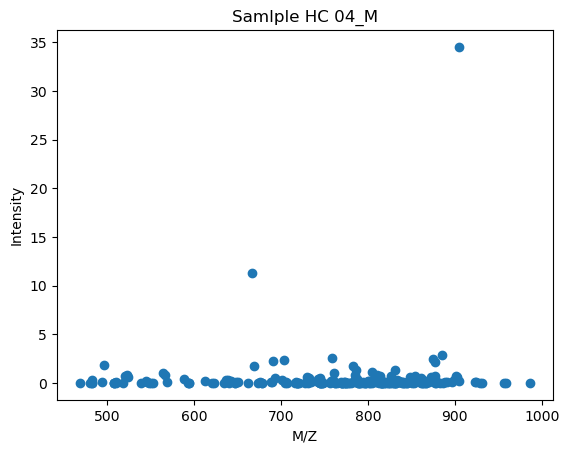

HC 04_M    34.537804
dtype: object


In [3]:
import matplotlib.pyplot as plt

plt.scatter(mz_lipidoma, df_x_lipidoma.iloc[89:90])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("Samlple HC 04_M")
plt.show()
# axis=1 sono le righe; axis=0 sono le colonne
print(df_x_lipidoma[89:90].max(axis=1))


In [4]:
df_x_lipidoma_original = df_x_lipidoma.copy()
for column in df_x_lipidoma.columns:
    df_x_lipidoma.loc[:,column] = df_x_lipidoma[column].fillna((np.nanmin(df_x_lipidoma[column]))/5)
print(df_x_lipidoma.isna().sum().sort_values(ascending=False))

CE 16:0                0
SM 18:2;2O/16:0        0
PE 18:0_18:1           0
PE 18:0_18:2           0
PE 18:2_18:0           0
                      ..
PC 16:1_18:2_B         0
PC 17:0_16:2           0
PC 17:0_17:0           0
PC 17:0_18:1           0
TG O-18:1_16:0_18:1    0
Length: 226, dtype: int64


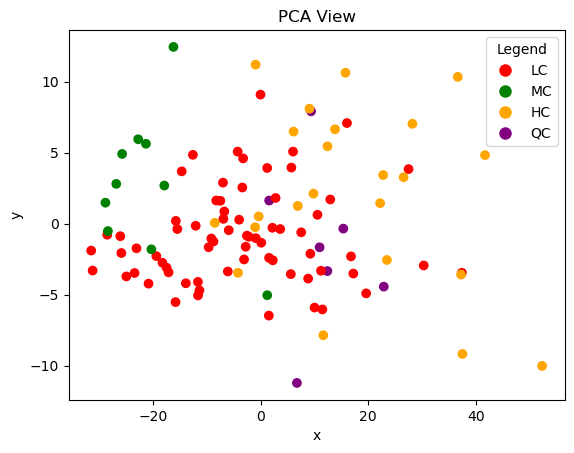

In [5]:
from sklearn.decomposition import PCA
pca_view = PCA(n_components=2)

scores_view = pca_view.fit_transform(df_x_lipidoma,df_y_lipidoma)


plt.scatter(scores_view[:, 0], scores_view[:, 1], c=colors)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='QC', markerfacecolor='purple', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()

LDA

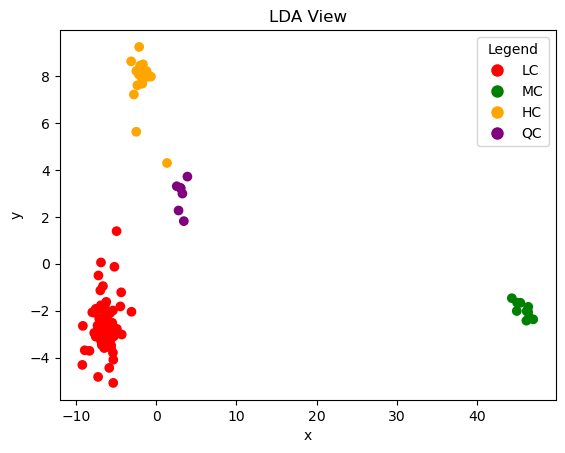

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda_fit_tic = LDA(n_components=2)
lda_scores = lda_fit_tic.fit_transform(df_x_lipidoma,df_y_lipidoma)

plt.scatter(lda_scores[:, 0], lda_scores[:, 1], c=colors)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='QC', markerfacecolor='purple', markersize=10),
], title='Legend')
plt.title('LDA View')
plt.show()

## Drop Outlier

In [7]:
drop = []

LC

In [8]:
## codice prova con la distanza di mahalonobis
lc = scores_view[7:76,:]
lc
mean_lc = np.mean(lc,axis=0)
cov_matrix = np.cov(lc,rowvar=False)

mahalanobis_distance_lc = []

for point in lc:
    diff = point - mean_lc
    distance = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(cov_matrix)), diff))
    mahalanobis_distance_lc.append(distance)
    
# print(mahalanobis_distance_lc)

outlier_lc = pd.DataFrame({"Sample":df_x_lipidoma.index[7:76],"outlier":mahalanobis_distance_lc}).sort_values(by="outlier",ascending=False)
outlier_lc

,Sample,outlier
19,LC 323_M,3.042468
51,LC 399_M,3.033468
13,LC307_M,2.680860
4,LC 241a_M,2.503711
1,LC 235a_M,2.483392
...,...,...
9,LC 270_M,0.237452
28,LC 350_M,0.210871
17,LC 320_M,0.208930
15,LC 315_M,0.116350


In [9]:
from scipy.stats import chi2

alpha = 0.05
threshold_distance_mahalanobis = chi2.ppf(1 - alpha, df = 2)
threshold_distance_mahalanobis

5.991464547107979

In [10]:
mean_out_lc = outlier_lc["outlier"].mean(axis=0)
temp = []
for sample,elem in outlier_lc.values:
    if elem > threshold_distance_mahalanobis:
        drop.append(sample)
        temp.append(sample)

outlier_lc = outlier_lc.drop(outlier_lc[outlier_lc["Sample"].isin(temp)].index)

drop

[]

MC

In [11]:
mc = scores_view[76:86,:]

mean_mc = np.mean(mc,axis=0)
cov_matrix = np.cov(mc,rowvar=False)

mahalanobis_distance_mc = []

for point in mc:
    diff = point - mean_mc
    distance = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(cov_matrix)), diff))
    mahalanobis_distance_mc.append(distance)

outlier_mc = pd.DataFrame({"Sample":df_x_lipidoma.index[76:86],"outlier":mahalanobis_distance_mc}).sort_values(by="outlier",ascending=False)
outlier_mc

,Sample,outlier
7,MC 15_M,2.655762
2,MC 09_M,2.288592
4,MC 11_M,1.323139
0,MC 04_M,1.089465
5,MC 13_M,0.994129
6,MC 14_M,0.728807
8,MC 17_M,0.640775
3,MC 10_M,0.630791
9,MC 18_M,0.582218
1,MC 05_M,0.323616


In [12]:
mean_out_mc = outlier_mc["outlier"].mean(axis=0)
temp = []
for sample,elem in outlier_mc.values:
    if elem > threshold_distance_mahalanobis:
        drop.append(sample)
        temp.append(sample)
        
outlier_mc = outlier_mc.drop(outlier_mc[outlier_mc["Sample"].isin(temp)].index)

drop

[]

HC

In [13]:
hc = scores_view[86:,:]

mean_hc = np.mean(hc,axis=0)
cov_matrix = np.cov(hc,rowvar=False)

mahalanobis_distance_hc = []

for point in hc:
    diff = point - mean_hc
    distance = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(cov_matrix)), diff))
    mahalanobis_distance_hc.append(distance)

outlier_hc = pd.DataFrame({"Sample":df_x_lipidoma.index[86:],"outlier":mahalanobis_distance_hc}).sort_values(by="outlier",ascending=False)
outlier_hc

,Sample,outlier
9,HC 10_M,2.629989
12,HC 13_M,2.060246
14,HC 15_M,2.016726
0,HC 01_M,1.808608
2,HC 03_M,1.778554
16,HC 17_M,1.736347
10,HC 11_M,1.710193
11,HC 12_M,1.708444
18,HC 19_M,1.436505
7,HC 08_M,1.384980


In [14]:
mean_out_hc = outlier_hc["outlier"].mean(axis=0)

temp = []
for sample,elem in outlier_hc.values:
    if elem > threshold_distance_mahalanobis:
        drop.append(sample)
        temp.append(sample)

outlier_hc = outlier_hc.drop(outlier_hc[outlier_hc["Sample"].isin(temp)].index) 
drop

[]

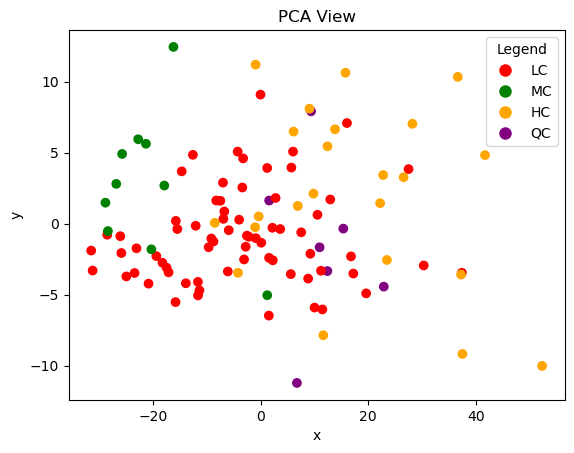

In [15]:
df_score_view = pd.DataFrame({"Sample":df_x_lipidoma.index,"Score View X":scores_view[:,0], "Score View Y":scores_view[:,1]})

index_drop = df_score_view[df_score_view["Sample"].isin(drop)].index
colors_after_drop = np.delete(colors,index_drop)
df_score_view = df_score_view.drop(index_drop)
df_score_view

plt.scatter(df_score_view["Score View X"], df_score_view["Score View Y"], c=colors_after_drop)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='QC', markerfacecolor='purple', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()

## Split Train and Test

Label
LC    69
HC    23
MC    10
Name: count, dtype: int64
Label
LC    69
HC    23
MC    10
Name: count, dtype: int64


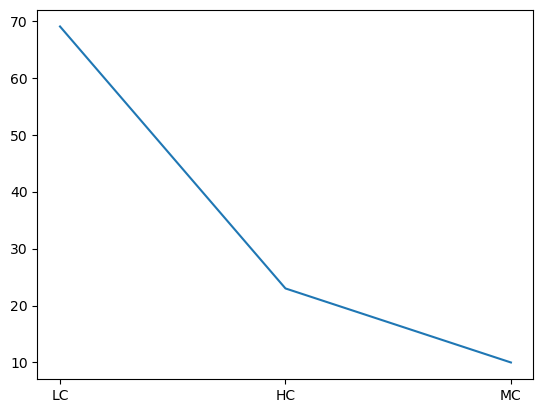

In [16]:
df_x_lipidoma_noqc = df_x_lipidoma.iloc[7:]
df_y_lipidoma_noqc = df_y_lipidoma.iloc[7:]

print(df_y_lipidoma_noqc.value_counts())

df_score_view_noqc = df_score_view.drop([0,1,2,3,4,5,6])

x = df_x_lipidoma_noqc.copy()
y = df_y_lipidoma_noqc.copy()

x = x.drop(drop)
y = y.drop(drop)
print(y.value_counts())
plt.plot(y.value_counts())
plt.show()

Split

In [17]:
train_size = 0.7

train_size_lc = int(len(outlier_lc)*train_size)
train_size_mc = int(len(outlier_mc)*train_size)
train_size_hc = int(len(outlier_hc)*train_size)

list_train_lc_x = x.loc[outlier_lc["Sample"].iloc[0:train_size_lc]]
list_train_lc_y = y.loc[outlier_lc["Sample"].iloc[0:train_size_lc]]

list_train_mc_x = x.loc[outlier_mc["Sample"].iloc[0:train_size_mc]]
list_train_mc_y = y.loc[outlier_mc["Sample"].iloc[0:train_size_mc]]

list_train_hc_x = x.loc[outlier_hc["Sample"].iloc[0:train_size_hc]]
list_train_hc_y = y.loc[outlier_hc["Sample"].iloc[0:train_size_hc]]

x_train = pd.concat([list_train_lc_x,list_train_mc_x,list_train_hc_x])
y_train = pd.concat([list_train_lc_y,list_train_mc_y,list_train_hc_y])
y_train

LC 323_M     LC
LC 399_M     LC
LC307_M      LC
LC 241a_M    LC
LC 235a_M    LC
             ..
HC 14_M      HC
HC 04_M      HC
HC 18_M      HC
HC 16_M      HC
HC 20_M      HC
Name: Label, Length: 71, dtype: object

In [18]:
x_test = x.loc[~x.isin(x_train.to_dict(orient='list')).all(axis=1)]
y_test = y[~y.index.isin(y_train.index)]
len(y_test)

31

In [19]:
name_sample_train = x_train.transpose().columns
name_sample_test = x_test.transpose().columns

Save Mean and Std of training set

In [20]:
mean= x_train.mean(axis=0)
std = x_train.std(axis=0)

## Dimensionality reduction

### Elbow Graph

In [21]:
from sklearn.decomposition import PCA

varianza_spiegata = []
n_componenti = np.arange(1, min((x_train.shape[0]),(x_train.shape[1])))

for n in n_componenti:
    pca_elbow = PCA(n_components=n)
    pca_elbow.fit(x_train)
    varianza_spiegata.append(np.sum(pca_elbow.explained_variance_ratio_))

Find the maximum distance between rope and elbow graph

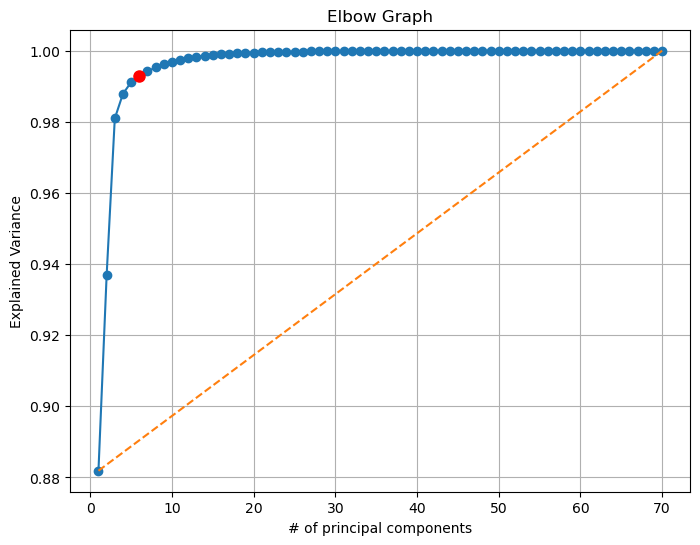

6

In [22]:
from scipy.spatial.distance import euclidean

points = np.array(list(zip(n_componenti,varianza_spiegata)))
points

first_point = points[0]
last_point = points[-1]

chord_length = euclidean(first_point, last_point)
distances = []
for point in points:
    distance = np.abs(np.cross(last_point - first_point, first_point - point)) / chord_length
    distances.append(distance)

max_distance_index = np.argmax(distances)
points[max_distance_index][0]
num_components_pca = int(points[max_distance_index][0])

plt.figure(figsize=(8, 6))
plt.plot(n_componenti, varianza_spiegata, marker='o')
plt.plot([1,len(varianza_spiegata)],[varianza_spiegata[0],varianza_spiegata[-1]], linestyle='--', label="Rope")
plt.plot(points[max_distance_index][0],points[max_distance_index][1], marker='o', markersize=8, color="red", label="Optimal Components")
plt.xlabel('# of principal components')
plt.ylabel('Explained Variance')
plt.title('Elbow Graph')
plt.grid(True)
plt.show()

num_components_pca

#### PCA

In [23]:
pca = PCA(n_components=num_components_pca)
x_train_pca = pca.fit(x_train).transform(x_train)
x_train_pca

array([[ 6.50573822e-01,  8.05792084e+00, -7.35012430e+00,
        -2.00979938e+00, -2.72371752e-01,  2.39160346e+00],
       [ 3.81586554e+01, -4.09729743e+00, -3.66427287e+00,
        -1.99957316e-01, -1.51430862e+00, -1.38458949e+00],
       [ 1.67811038e+01,  6.41176109e+00, -4.63827753e+00,
         2.79298625e-01,  4.91605254e-01, -1.37086291e+00],
       [ 3.10586967e+01, -3.58937894e+00, -3.61966997e+00,
        -8.50301000e-02,  5.73672182e-01,  1.55957754e-01],
       [ 2.82689553e+01,  3.42122095e+00, -3.28638096e+00,
         1.04260918e+00,  3.28713430e+00, -4.27358858e-01],
       [ 2.03484401e+01, -5.16538854e+00, -1.58651085e+00,
        -7.73877273e-01, -1.50335175e+00, -1.58687108e+00],
       [ 1.22275219e+01, -5.83966390e+00,  1.25434324e+00,
         2.38592018e-01,  1.60332248e+00,  5.53189647e-02],
       [-3.05681394e+01, -3.30968437e+00, -7.00791079e-01,
        -1.76624053e+00, -1.00488238e+00,  1.84252901e-01],
       [-1.18439730e+01,  5.35750848e+00,  1.572

### Prepare the training set for models 

Train

In [24]:
X_w = pd.DataFrame(x_train_pca)
Y_w = y_train

X_w.columns = [f'PC{i+1}' for i in range(X_w.shape[1])]
X_w = X_w.transpose()
X_w.columns = name_sample_train
X_w = X_w.transpose()

all_performance = []

Test

In [25]:
# autoscaling on test set
x_test_centered = (x_test.sub(mean,axis=1)).div(std,axis=1)
x_test_centered_pca = pca.transform(x_test_centered)

x_test_centered_pca = pd.DataFrame(x_test_centered_pca)
x_test_centered_pca.columns = [f'PC{i+1}' for i in range(x_test_centered_pca.shape[1])]
x_test_centered_pca = x_test_centered_pca.transpose()
x_test_centered_pca.columns = name_sample_test
x_test_centered_pca = x_test_centered_pca.transpose()

### Logistic Regression

In [26]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from imblearn.over_sampling import BorderlineSMOTE

loo = LeaveOneOut()

performance_scores = []
performance_scores_balanced = []
i = 0
# Itera attraverso i fold
for train_index, val_index in loo.split(X_w,Y_w):
    i+=1
    
    train_x_temp, test_x_temp = X_w.iloc[train_index],X_w.iloc[val_index]
    train_y_temp, test_y_temp = Y_w.iloc[train_index],Y_w.iloc[val_index]
    
    #ribilanciamento
    bls = BorderlineSMOTE(random_state=99)
    train_x_temp,train_y_temp = bls.fit_resample(train_x_temp,train_y_temp)

    # normalizzazione
    mean_temp= train_x_temp.mean(axis=0)
    std_temp = train_x_temp.std(axis=0)
    train_x_temp = (train_x_temp.sub(mean_temp,axis=1)).div(std_temp,axis=1)

    test_x_temp = (test_x_temp.sub(mean_temp,axis=1)).div(std_temp,axis=1)
    
    lm = LogisticRegression(penalty=None,class_weight='balanced', multi_class='auto',max_iter=10000, n_jobs=4, solver='saga') # penalty{‘l1’, ‘l2’, ‘elasticnet’, None}; multi_class{‘auto’, ‘ovr’, ‘multinomial’}
    
    lm.fit(train_x_temp, train_y_temp)
    
    predicted_y_temp = lm.predict(test_x_temp)

    # Calcola e memorizza la misura delle prestazioni (es. accuratezza)
    accuracy_temp = np.round(mt.accuracy_score(test_y_temp.values,predicted_y_temp)*100,2)
    performance_scores.append(accuracy_temp)
    balanced_accuracy_temp = np.round(mt.balanced_accuracy_score(test_y_temp.values,predicted_y_temp)*100,2)
    performance_scores_balanced.append(balanced_accuracy_temp)
    
mean_accuracy_temp = sum(performance_scores)/i
mean_accuracy_balanced_temp = sum(performance_scores_balanced)/i

print("L'accuracy è: ", mean_accuracy_temp, "\nLa balanced_accuracy è: ", mean_accuracy_balanced_temp)

all_performance = [{"Logistic Regression":{
    "Validation": {
        "BorderlineSMOTE": mean_accuracy_balanced_temp
    }
}}]

/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains

L'accuracy è:  83.09859154929578 
La balanced_accuracy è:  83.09859154929578


/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Try on Test Set

In [27]:
predicted_y_test = lm.predict(x_test_centered_pca)
balanced_accuracy = np.round(mt.balanced_accuracy_score(y_test,predicted_y_test)*100,2)
all_performance[0]["Logistic Regression"]["Test"]= {"BorderlineSMOTE":balanced_accuracy}
balanced_accuracy

33.33

Show the error in Logistic Regression

Gli errori vengono commessi sul campione:  [  7   9  10  12  15  17  20  22  24  28  29  34  35  37  38  42  44  45
  46  48  52  83  84  85  87  98  99 101]


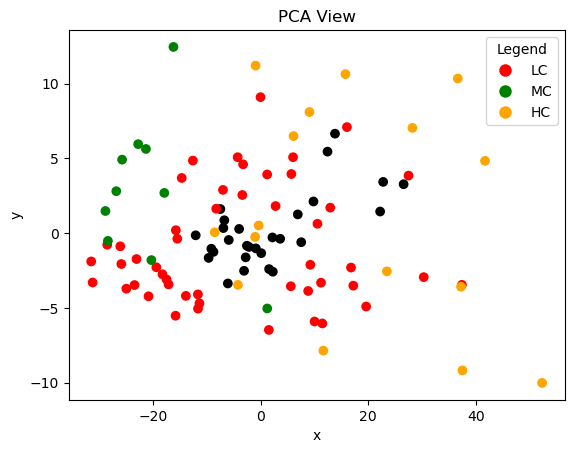

In [28]:
show_error_lr = pd.DataFrame({"Predict":predicted_y_test, "Real":y_test})
errors_name = show_error_lr[show_error_lr["Predict"] != show_error_lr["Real"]].index
errors_name

error_index = (df_score_view_noqc[df_score_view_noqc["Sample"].isin(errors_name)].index) - 7
print("Gli errori vengono commessi sul campione: ",error_index.values)

colors_with_error = colors_after_drop.copy()
colors_with_error = np.delete(colors_with_error,[0,1,2,3,4,5,6])
colors_with_error[error_index] = "black"

plt.scatter(df_score_view_noqc["Score View X"], df_score_view_noqc["Score View Y"], c=colors_with_error)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()

### SVM

In [29]:
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn import metrics as mt
from imblearn.over_sampling import BorderlineSMOTE

loo = LeaveOneOut()

performance_scores = []
performance_scores_balanced = []
i = 0
# Itera attraverso i fold
for train_index, val_index in loo.split(X_w):
    i+=1
    train_x_temp, test_x_temp = X_w.iloc[train_index],X_w.iloc[val_index]
    train_y_temp, test_y_temp = Y_w.iloc[train_index],Y_w.iloc[val_index]
    
    # balancing
    train_x_temp,train_y_temp = BorderlineSMOTE(random_state=99).fit_resample(train_x_temp,train_y_temp)
    
    # normalization
    mean_temp= train_x_temp.mean(axis=0)
    std_temp = train_x_temp.std(axis=0)
    train_x_temp = (train_x_temp.sub(mean_temp,axis=1)).div(std_temp,axis=1)

    test_x_temp = (test_x_temp.sub(mean_temp,axis=1)).div(std_temp,axis=1)
    
    model_svc = SVC(C=1.0,kernel="linear", gamma="scale")
    model_svc.fit(train_x_temp,train_y_temp)
    
    predicted_y_temp = model_svc.predict(test_x_temp)
    
    accuracy_temp = np.round(mt.accuracy_score(test_y_temp,predicted_y_temp)*100,2)
    performance_scores.append(accuracy_temp)
    balanced_accuracy_temp = np.round(mt.balanced_accuracy_score(test_y_temp,predicted_y_temp)*100,2)
    performance_scores_balanced.append(balanced_accuracy_temp)
    
mean_accuracy_temp = sum(performance_scores)/i
mean_accuracy_balanced_temp = sum(performance_scores_balanced)/i

print("L'accuracy è: ", mean_accuracy_temp, "%\nLa balanced_accuracy è: ", mean_accuracy_balanced_temp,"%")

all_performance.append({"SVM":{"Validation": {"BorderlineSMOTE":mean_accuracy_balanced_temp}}})

/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains

L'accuracy è:  78.87323943661971 %
La balanced_accuracy è:  78.87323943661971 %


Try on Test

In [30]:
predicted_y_test = model_svc.predict(x_test_centered_pca)
balanced_accuracy = np.round(mt.balanced_accuracy_score(y_test,predicted_y_test)*100,2)
all_performance[1]["SVM"]["Test"]= {"BorderlineSMOTE":balanced_accuracy}
balanced_accuracy

33.33

Show Error in SVM

Gli errori vengono commessi sul campione:  [  7   9  10  12  15  17  20  22  24  28  29  34  35  37  38  42  44  45
  46  48  52  83  84  85  87  98  99 101]


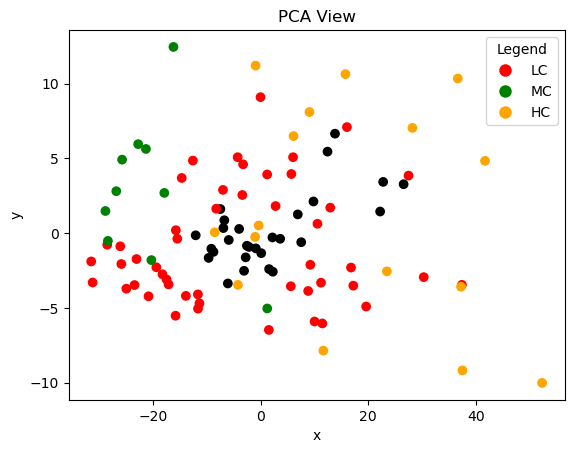

In [31]:
show_error_svm = pd.DataFrame({"Predict":predicted_y_test, "Real":y_test})
errors_name = show_error_svm[show_error_svm["Predict"] != show_error_svm["Real"]].index
errors_name

error_index = (df_score_view_noqc[df_score_view_noqc["Sample"].isin(errors_name)].index) - 7
print("Gli errori vengono commessi sul campione: ",error_index.values)
colors_with_error = colors_after_drop.copy()
colors_with_error = np.delete(colors_with_error,[0,1,2,3,4,5,6])
colors_with_error[error_index] = "black"

plt.scatter(df_score_view_noqc["Score View X"], df_score_view_noqc["Score View Y"], c=colors_with_error)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()

### Random Forests

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as mt
from sklearn.model_selection import LeaveOneOut
from imblearn.over_sampling import BorderlineSMOTE

loo = LeaveOneOut()

performance_scores = []
performance_scores_balanced = []
i = 0

for train_index, val_index in loo.split(X_w):
    i+=1
    train_x_temp, test_x_temp = X_w.iloc[train_index],X_w.iloc[val_index]
    train_y_temp, test_y_temp = Y_w.iloc[train_index],Y_w.iloc[val_index]
    
    train_x_temp,train_y_temp = BorderlineSMOTE(random_state=99).fit_resample(train_x_temp,train_y_temp)
    
    # normalizzazione
    mean_temp = train_x_temp.mean(axis=0)
    std_temp = train_x_temp.std(axis=0)
    train_x_temp = (train_x_temp.sub(mean_temp,axis=1)).div(std_temp,axis=1)

    test_x_temp = (test_x_temp.sub(mean_temp,axis=1)).div(std_temp,axis=1)
    
    rf_model = RandomForestClassifier(n_estimators=200, random_state=3, max_depth=22, n_jobs=4)
    rf_model.fit(train_x_temp, train_y_temp)
    predicted_y_temp = rf_model.predict(test_x_temp)
    
    accuracy_temp = np.round(mt.accuracy_score(test_y_temp,predicted_y_temp)*100,2)
    performance_scores.append(accuracy_temp)
    balanced_accuracy_temp = np.round(mt.balanced_accuracy_score(test_y_temp,predicted_y_temp)*100,2)
    performance_scores_balanced.append(balanced_accuracy_temp)
    
mean_accuracy_temp = sum(performance_scores)/i
mean_accuracy_balanced_temp = sum(performance_scores_balanced)/i

print("L'accuracy è: ", mean_accuracy_temp, "%\nLa balanced_accuracy è: ", mean_accuracy_balanced_temp,"%")

all_performance.append({"Random Forests":{"Validation": {"BorderlineSMOTE":mean_accuracy_balanced_temp}}})

/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains

L'accuracy è:  80.28169014084507 %
La balanced_accuracy è:  80.28169014084507 %


Try on Test

In [33]:
predicted_y_test = rf_model.predict(x_test_centered_pca)
balanced_accuracy = np.round(mt.balanced_accuracy_score(y_test,predicted_y_test)*100,2)
all_performance[2]["Random Forests"]["Test"]= {"BorderlineSMOTE":balanced_accuracy}
balanced_accuracy

66.67

Show Error in Random Forests

Gli errori vengono commessi sul campione:  [ 83  84  85  87  98  99 101]


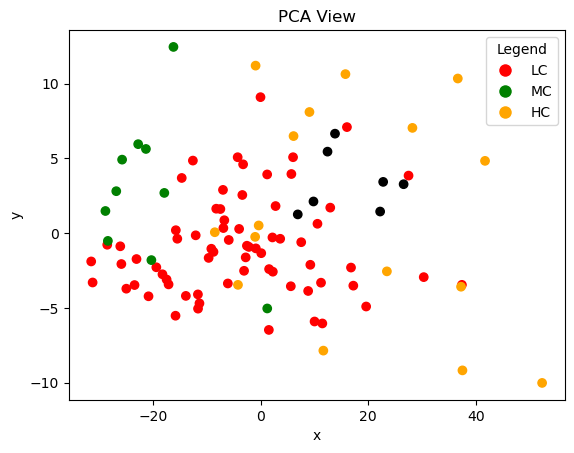

In [34]:
show_error_rf = pd.DataFrame({"Predict":predicted_y_test, "Real":y_test})
errors_name = show_error_rf[show_error_rf["Predict"] != show_error_rf["Real"]].index
errors_name

error_index = (df_score_view_noqc[df_score_view_noqc["Sample"].isin(errors_name)].index) - 7
print("Gli errori vengono commessi sul campione: ",error_index.values)
colors_with_error = colors_after_drop.copy()
colors_with_error = np.delete(colors_with_error,[0,1,2,3,4,5,6])
colors_with_error[error_index] = "black"

plt.scatter(df_score_view_noqc["Score View X"], df_score_view_noqc["Score View Y"], c=colors_with_error)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10),
], title='Legend')
plt.title('PCA View')
plt.show()

## Write on File

In [35]:
import json
file_path = "output_lipidoma_models.txt"
with open(file_path, "a") as file:
    json.dump(all_performance, file, indent=4)